<a href="https://colab.research.google.com/github/debjyoti003/Important-Colab-Notebooks/blob/main/EDA_on_tweets_for_3_pre_processed_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
nltk.download('wordnet')
import nltk
import json

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
os.chdir(r'/content/drive/MyDrive/for EDA')
os.listdir()

['preprocessed_extracted_tweets.csv',
 'Preprocessed_tweets_df_USGS.csv',
 'Preprocessed_twitter_data_twint.csv']

In [ ]:
df = pd.read_csv(r'Preprocessed_twitter_data_twint.csv')
df.head()

,Unnamed: 0,date/time range,timezone,user_id,username,place,tweet,hashtags,Cleaned Tweets,category
0,0,2020-10-31 07:56:37,800,17580230,jarallen,Not Specified,@austinperroux @NWSSanAntonio Same here. I’ve ...,NoTags,"['austinperroux', 'NWSSanAntonio', 'I’ve', 'ne...",flood
1,1,2020-10-31 07:49:35,800,472122299,philippinestar,Not Specified,"Flooding (including flash floods), rain-induce...",NoTags,"['Flooding', 'including', 'flash', 'floods', '...",flood
2,2,2020-10-31 07:23:57,800,2453732882,ttweathercenter,Not Specified,7:20 PM - Flash flooding continues in Arouca t...,NoTags,"['720', 'PM', 'Flash', 'flooding', 'continues'...",flood
3,3,2020-10-31 07:12:06,800,2453732882,ttweathercenter,Not Specified,Another video of the flash flooding ongoing at...,NoTags,"['Another', 'video', 'flash', 'flooding', 'ong...",flood
4,4,2020-10-31 07:10:16,800,2453732882,ttweathercenter,Not Specified,7:05 PM - Flash flooding ongoing at Henry Stre...,NoTags,"['705', 'PM', 'Flash', 'flooding', 'ongoing', ...",flood


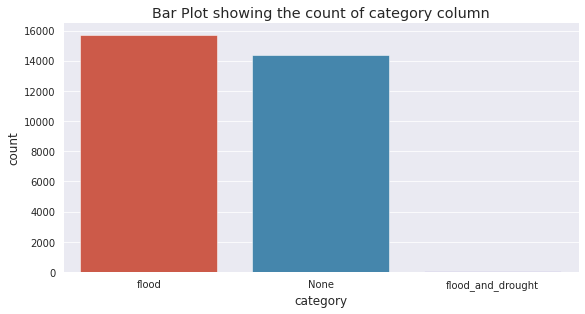

In [ ]:
sns.set_style('darkgrid')
sns.catplot(x = "category",data = df, kind = "count",height=4,aspect=2).set(title = 'Bar Plot showing the count of category column')
# sns.title('Bar Plot showing the count of category column')

In [ ]:
new_cleaned = []
for i in range(len(df['Cleaned Tweets'])):
  new_cleaned.append(df['Cleaned Tweets'][i].replace('[','').replace(']','').replace("'",'').split(','))
 
for i in range(len(new_cleaned)):
  for element in new_cleaned[i]:
    if element.__contains__('http'):
      new_cleaned[i].remove(element)
 
for i in range(len(new_cleaned)):
  for element in new_cleaned[i]:
    if element.__contains__('http'):
      new_cleaned[i].remove(element)

In [ ]:
df['Cleaned Further'] = new_cleaned
df.head()

,Unnamed: 0,date/time range,timezone,user_id,username,place,tweet,hashtags,Cleaned Tweets,category,Cleaned Further
0,0,2020-10-31 07:56:37,800,17580230,jarallen,Not Specified,@austinperroux @NWSSanAntonio Same here. I’ve ...,NoTags,"['austinperroux', 'NWSSanAntonio', 'I’ve', 'ne...",flood,"[austinperroux, NWSSanAntonio, I’ve, never,..."
1,1,2020-10-31 07:49:35,800,472122299,philippinestar,Not Specified,"Flooding (including flash floods), rain-induce...",NoTags,"['Flooding', 'including', 'flash', 'floods', '...",flood,"[Flooding, including, flash, floods, raini..."
2,2,2020-10-31 07:23:57,800,2453732882,ttweathercenter,Not Specified,7:20 PM - Flash flooding continues in Arouca t...,NoTags,"['720', 'PM', 'Flash', 'flooding', 'continues'...",flood,"[720, PM, Flash, flooding, continues, Aro..."
3,3,2020-10-31 07:12:06,800,2453732882,ttweathercenter,Not Specified,Another video of the flash flooding ongoing at...,NoTags,"['Another', 'video', 'flash', 'flooding', 'ong...",flood,"[Another, video, flash, flooding, ongoing,..."
4,4,2020-10-31 07:10:16,800,2453732882,ttweathercenter,Not Specified,7:05 PM - Flash flooding ongoing at Henry Stre...,NoTags,"['705', 'PM', 'Flash', 'flooding', 'ongoing', ...",flood,"[705, PM, Flash, flooding, ongoing, Henry..."


In [ ]:
def word_count(text):
  length = len(text)
  return length
 
df['Word count of each tweet'] = df['Cleaned Further'].apply(word_count)
df.head()

,Unnamed: 0,date/time range,timezone,user_id,username,place,tweet,hashtags,Cleaned Tweets,category,Cleaned Further,Word count of each tweet
0,0,2020-10-31 07:56:37,800,17580230,jarallen,Not Specified,@austinperroux @NWSSanAntonio Same here. I’ve ...,NoTags,"['austinperroux', 'NWSSanAntonio', 'I’ve', 'ne...",flood,"[austinperroux, NWSSanAntonio, I’ve, never,...",22
1,1,2020-10-31 07:49:35,800,472122299,philippinestar,Not Specified,"Flooding (including flash floods), rain-induce...",NoTags,"['Flooding', 'including', 'flash', 'floods', '...",flood,"[Flooding, including, flash, floods, raini...",21
2,2,2020-10-31 07:23:57,800,2453732882,ttweathercenter,Not Specified,7:20 PM - Flash flooding continues in Arouca t...,NoTags,"['720', 'PM', 'Flash', 'flooding', 'continues'...",flood,"[720, PM, Flash, flooding, continues, Aro...",14
3,3,2020-10-31 07:12:06,800,2453732882,ttweathercenter,Not Specified,Another video of the flash flooding ongoing at...,NoTags,"['Another', 'video', 'flash', 'flooding', 'ong...",flood,"[Another, video, flash, flooding, ongoing,...",18
4,4,2020-10-31 07:10:16,800,2453732882,ttweathercenter,Not Specified,7:05 PM - Flash flooding ongoing at Henry Stre...,NoTags,"['705', 'PM', 'Flash', 'flooding', 'ongoing', ...",flood,"[705, PM, Flash, flooding, ongoing, Henry...",15


In [ ]:
max(df['Word count of each tweet']), min(df['Word count of each tweet'])

(81, 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each tweet')

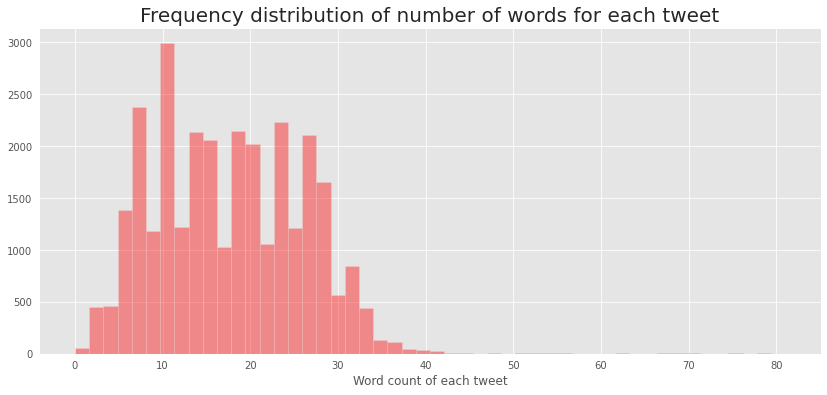

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df['Word count of each tweet'],kde = False,color="red")
plt.title("Frequency distribution of number of words for each tweet", size=20)

**Word Cloud for the category 'Flood'**

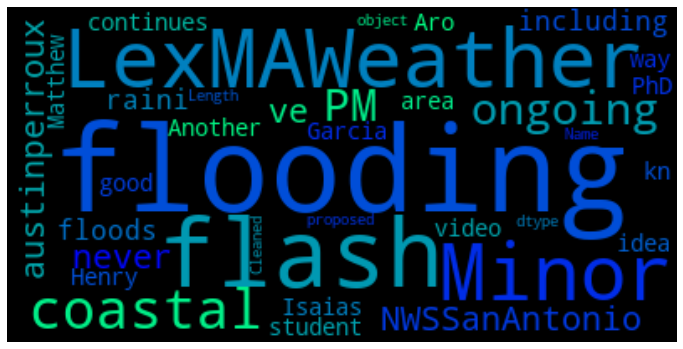

In [ ]:
cloud=WordCloud(colormap="winter").generate(str(df[df['category'] == 'flood']["Cleaned Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

**Word cloud for the category of 'None'**

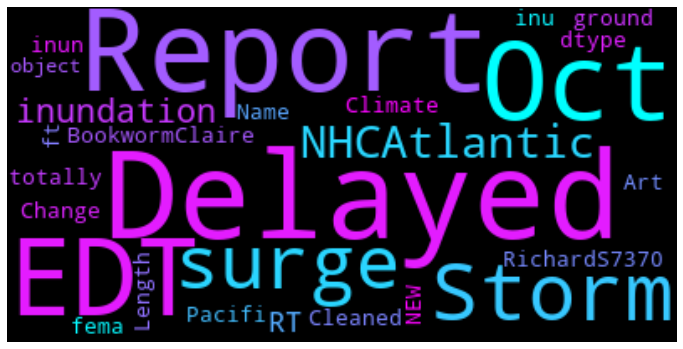

In [ ]:
cloud=WordCloud(colormap="cool").generate(str(df[df['category'] == 'None']["Cleaned Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Text(0.5, 1.0, '30 most frequent words')

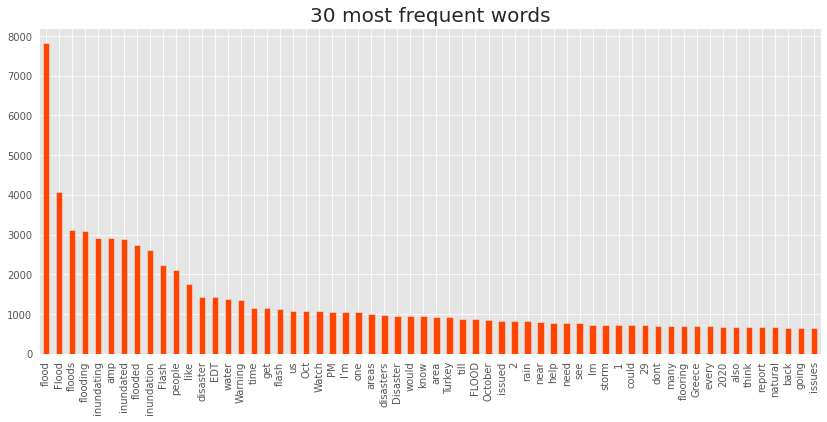

In [ ]:
def joined(text):
  return ' '.join(text)
 
df['Cleaned Joined'] = df['Cleaned Further'].apply(joined)
 
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df["Cleaned Joined"]).split()).value_counts()[:60]
freq.plot(kind="bar", color = "orangered")
plt.title("30 most frequent words",size=20)

The above was EDA for the pre-processed file **Preprocessed_twitter_data_twint.csv**

#EDA for Preprocessed_tweets_df_USGS.csv

In [ ]:
df1 = pd.read_csv(r'Preprocessed_tweets_df_USGS.csv')
df1.head()

,Unnamed: 0,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language,Cleaned Tweets,category
0,0,1550621509,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 23:27:13,Kate Giannini,iahuntress,"Riverside, IA",NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood
1,1,308297667,RT @SenatorRobHogg: When @CityofCRIowa city co...,2021-05-12 23:23:50,LusciousPixie,LauriJax,"West Des Moines, IA",NaN,Not Specified,en,"['RT', 'SenatorRobHogg', 'When', 'CityofCRIowa...",None
2,2,1379199206771019779,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 22:45:19,Dave Muhlbauer,DaveMuhlbauer,Iowa,NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood
3,3,22962704,Ames Flood mitigation project dusting off the ...,2021-05-12 22:39:26,Roger Riley,rogerriley,Somewhere in Iowa USA,NaN,"Ames, IA",en,"['Ames', 'Flood', 'mitigation', 'project', 'du...",flood
4,4,1343943153427087361,IWX extends time of Flood Warning for Maumee R...,2021-05-12 22:07:55,WxChicagoland,ChicagolandWx,"Des Moines, Iowa",NaN,Not Specified,en,"['IWX', 'extends', 'time', 'Flood', 'Warning',...",flood


Text(0.5, 1.0, 'Bar Plot showing the count of category column')

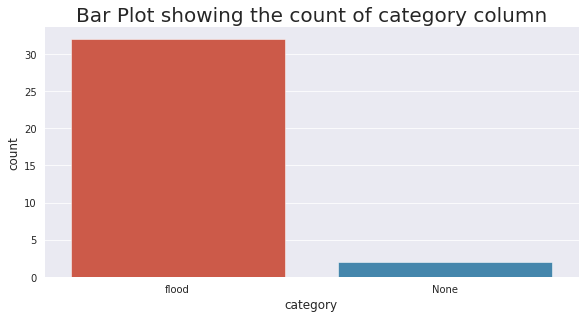

In [ ]:
sns.set_style('darkgrid')
sns.catplot(x = "category",data = df1, kind = "count",height=4,aspect=2)
plt.title('Bar Plot showing the count of category column', size = 20)

In [ ]:
new_cleaned1 = []
for i in range(len(df1['Cleaned Tweets'])):
  new_cleaned1.append(df1['Cleaned Tweets'][i].replace('[','').replace(']','').replace("'",'').split(','))

df1['Cleaned Further'] = new_cleaned1
df1.head()

,Unnamed: 0,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language,Cleaned Tweets,category,Cleaned Further
0,0,1550621509,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 23:27:13,Kate Giannini,iahuntress,"Riverside, IA",NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood,"[RT, katiepeikes, Iowa, scientists, develo..."
1,1,308297667,RT @SenatorRobHogg: When @CityofCRIowa city co...,2021-05-12 23:23:50,LusciousPixie,LauriJax,"West Des Moines, IA",NaN,Not Specified,en,"['RT', 'SenatorRobHogg', 'When', 'CityofCRIowa...",None,"[RT, SenatorRobHogg, When, CityofCRIowa, c..."
2,2,1379199206771019779,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 22:45:19,Dave Muhlbauer,DaveMuhlbauer,Iowa,NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood,"[RT, katiepeikes, Iowa, scientists, develo..."
3,3,22962704,Ames Flood mitigation project dusting off the ...,2021-05-12 22:39:26,Roger Riley,rogerriley,Somewhere in Iowa USA,NaN,"Ames, IA",en,"['Ames', 'Flood', 'mitigation', 'project', 'du...",flood,"[Ames, Flood, mitigation, project, dusting..."
4,4,1343943153427087361,IWX extends time of Flood Warning for Maumee R...,2021-05-12 22:07:55,WxChicagoland,ChicagolandWx,"Des Moines, Iowa",NaN,Not Specified,en,"['IWX', 'extends', 'time', 'Flood', 'Warning',...",flood,"[IWX, extends, time, Flood, Warning, Maum..."


In [ ]:
df1['Word count of each tweet'] = df1['Cleaned Further'].apply(word_count)
df1.head()

,Unnamed: 0,Tweet User Id,Tweet Text,Tweet Time,Tweet User Name,Twitter @ Name,Tweet User Location,Tweet Coordinates,Place Info,Language,Cleaned Tweets,category,Cleaned Further,Word count of each tweet
0,0,1550621509,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 23:27:13,Kate Giannini,iahuntress,"Riverside, IA",NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood,"[RT, katiepeikes, Iowa, scientists, develo...",15
1,1,308297667,RT @SenatorRobHogg: When @CityofCRIowa city co...,2021-05-12 23:23:50,LusciousPixie,LauriJax,"West Des Moines, IA",NaN,Not Specified,en,"['RT', 'SenatorRobHogg', 'When', 'CityofCRIowa...",None,"[RT, SenatorRobHogg, When, CityofCRIowa, c...",18
2,2,1379199206771019779,RT @katiepeikes: Iowa scientists are developin...,2021-05-12 22:45:19,Dave Muhlbauer,DaveMuhlbauer,Iowa,NaN,Not Specified,en,"['RT', 'katiepeikes', 'Iowa', 'scientists', 'd...",flood,"[RT, katiepeikes, Iowa, scientists, develo...",15
3,3,22962704,Ames Flood mitigation project dusting off the ...,2021-05-12 22:39:26,Roger Riley,rogerriley,Somewhere in Iowa USA,NaN,"Ames, IA",en,"['Ames', 'Flood', 'mitigation', 'project', 'du...",flood,"[Ames, Flood, mitigation, project, dusting...",16
4,4,1343943153427087361,IWX extends time of Flood Warning for Maumee R...,2021-05-12 22:07:55,WxChicagoland,ChicagolandWx,"Des Moines, Iowa",NaN,Not Specified,en,"['IWX', 'extends', 'time', 'Flood', 'Warning',...",flood,"[IWX, extends, time, Flood, Warning, Maum...",22


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each tweet')

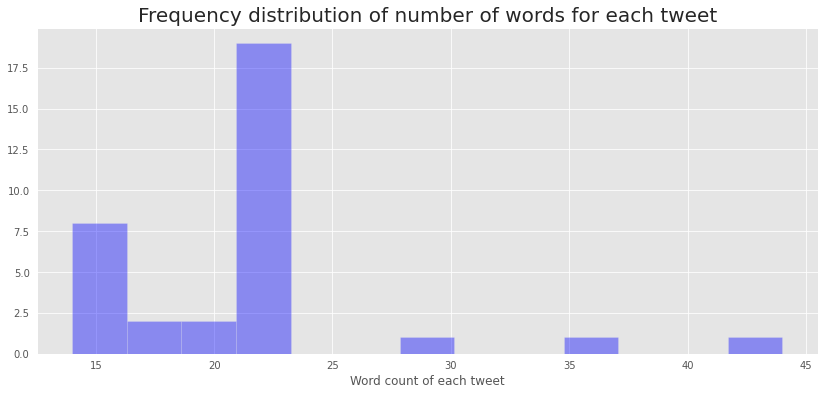

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df1['Word count of each tweet'],kde = False,color="blue")
plt.title("Frequency distribution of number of words for each tweet", size=20)

**Word cloud for the category of 'Flood'**

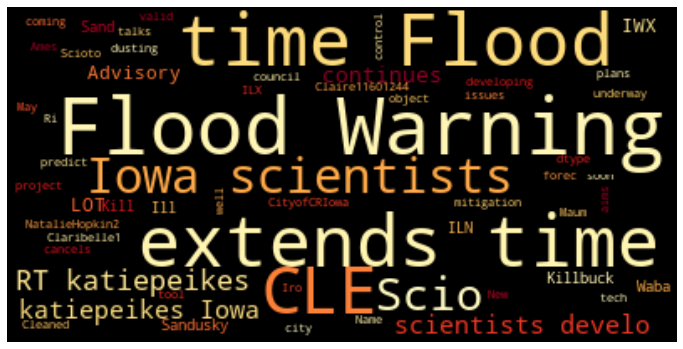

In [ ]:
cloud=WordCloud(colormap="YlOrRd").generate(str(df1[df1['category'] == 'flood']["Cleaned Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

**Word Cloud for the category of 'None'**

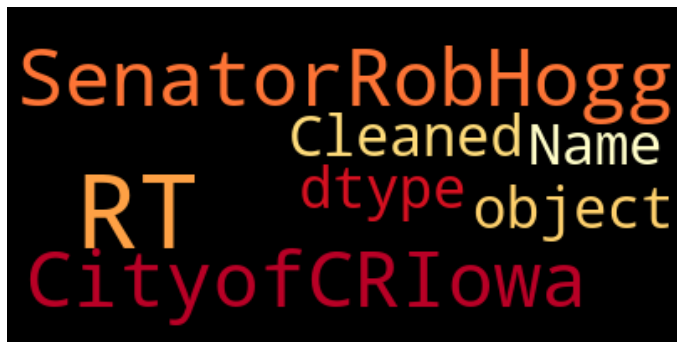

In [ ]:
cloud=WordCloud(colormap="YlOrRd").generate(str(df1[df1['category'] == 'None']["Cleaned Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Text(0.5, 1.0, '30 most frequent words')

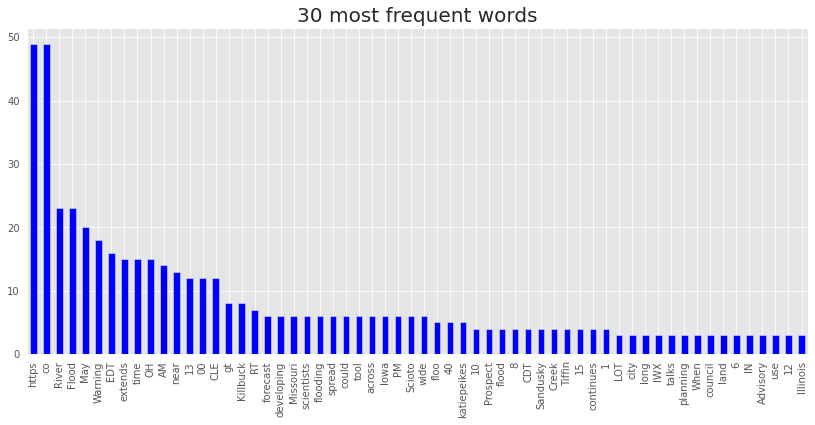

In [ ]:
def joined(text):
  return ' '.join(text)

df1['Cleaned Joined'] = df1['Cleaned Further'].apply(joined)

plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df1["Cleaned Joined"]).split()).value_counts()[:60]
freq.plot(kind="bar", color = "blue")
plt.title("30 most frequent words",size=20)

# EDA for preprocessed_extracted_tweets.csv

In [ ]:
df2 = pd.read_csv(r'preprocessed_extracted_tweets.csv')
df2.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,urls,photos,hashtags,link,retweet,quote_url,video,Cleaned Tweets,Cleaned Tweets Further,Location Name
0,0,1.392400e+18,1.392400e+18,2021-05-12 14:01:43 India Standard Time,12-05-2021,14:01:43,530,8.929951e+08,ifrcafrica,IFRC Africa,NaN,"Across Africa, at any given time, Red Cross an...",en,['http://bit.ly/2RNeRSU'],['https://pbs.twimg.com/media/E1LJvvxWEAIRV86....,['floods'],https://twitter.com/IFRCAfrica/status/13923970...,False,NaN,1,"across africa, at any given time, red cross an...",across africa at any given time red cross an...,[]
1,1,1.392400e+18,1.392400e+18,2021-05-12 13:55:41 India Standard Time,12-05-2021,13:55:41,530,9.085950e+17,wanjohikinguru,Wanjohi King'uru,NaN,Poor drainage in Transami means we have to end...,en,[],[],"['nairobi', 'floods']",https://twitter.com/WanjohiKinguru/status/1392...,False,NaN,1,poor drainage in transami means we have to end...,poor drainage in transami means we have to end...,[]
2,2,1.392390e+18,1.392390e+18,2021-05-12 13:35:46 India Standard Time,12-05-2021,13:35:46,530,1.604304e+07,ncedigital,New Civil Engineer,NaN,Daily brief: 🌥️ Queen's Speech intensifies #H...,en,"['https://buff.ly/3eDdK1i', 'https://buff.ly/3...",['https://pbs.twimg.com/media/E1LDz05XIAAptuR....,"['hs2', 'engineering', 'civilengineering', 'ra...",https://twitter.com/ncedigital/status/13923905...,False,NaN,1,daily brief: 🌥️ queen's speech intensifies hs2...,daily brief queen s speech intensifies hs2...,[]
3,3,1.392390e+18,1.392390e+18,2021-05-12 13:34:05 India Standard Time,12-05-2021,13:34:05,530,2.985111e+09,malurussally,Sally Forsstrom,NaN,#climate change impacts here already with #dro...,en,[],[],"['climate', 'drought', 'bushfires', 'floods', ...",https://twitter.com/MalurusSally/status/139239...,False,https://twitter.com/shoebridgemlc/status/13922...,0,climate change impacts here already with droug...,climate change impacts here already with droug...,[]
4,4,1.392390e+18,1.392390e+18,2021-05-12 13:29:27 India Standard Time,12-05-2021,13:29:27,530,8.565930e+17,infonile,InfoNile,NaN,"🧵: This is Thirst in a River Basin, an interac...",en,['https://maps.infonile.org/covid-water-scarci...,['https://pbs.twimg.com/media/E1LCXHmXoAM1J_9....,"['infomap', 'rainfall', 'droughts', 'floods', ...",https://twitter.com/infoNILE/status/1392388939...,False,NaN,1,"🧵: this is thirst in a river basin, an interac...",this is thirst in a river basin an interac...,[]


In [ ]:
def small_preprocess(text):
  clean = text.strip()
  clean=re.sub("\s{2,}"," ",clean)
  return clean

df2['Cleaned Tweets Further'] = df2['Cleaned Tweets Further'].apply(small_preprocess)
df2.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,urls,photos,hashtags,link,retweet,quote_url,video,Cleaned Tweets,Cleaned Tweets Further,Location Name
0,0,1.392400e+18,1.392400e+18,2021-05-12 14:01:43 India Standard Time,12-05-2021,14:01:43,530,8.929951e+08,ifrcafrica,IFRC Africa,NaN,"Across Africa, at any given time, Red Cross an...",en,['http://bit.ly/2RNeRSU'],['https://pbs.twimg.com/media/E1LJvvxWEAIRV86....,['floods'],https://twitter.com/IFRCAfrica/status/13923970...,False,NaN,1,"across africa, at any given time, red cross an...",across africa at any given time red cross and ...,[]
1,1,1.392400e+18,1.392400e+18,2021-05-12 13:55:41 India Standard Time,12-05-2021,13:55:41,530,9.085950e+17,wanjohikinguru,Wanjohi King'uru,NaN,Poor drainage in Transami means we have to end...,en,[],[],"['nairobi', 'floods']",https://twitter.com/WanjohiKinguru/status/1392...,False,NaN,1,poor drainage in transami means we have to end...,poor drainage in transami means we have to end...,[]
2,2,1.392390e+18,1.392390e+18,2021-05-12 13:35:46 India Standard Time,12-05-2021,13:35:46,530,1.604304e+07,ncedigital,New Civil Engineer,NaN,Daily brief: 🌥️ Queen's Speech intensifies #H...,en,"['https://buff.ly/3eDdK1i', 'https://buff.ly/3...",['https://pbs.twimg.com/media/E1LDz05XIAAptuR....,"['hs2', 'engineering', 'civilengineering', 'ra...",https://twitter.com/ncedigital/status/13923905...,False,NaN,1,daily brief: 🌥️ queen's speech intensifies hs2...,daily brief queen s speech intensifies hs2 anx...,[]
3,3,1.392390e+18,1.392390e+18,2021-05-12 13:34:05 India Standard Time,12-05-2021,13:34:05,530,2.985111e+09,malurussally,Sally Forsstrom,NaN,#climate change impacts here already with #dro...,en,[],[],"['climate', 'drought', 'bushfires', 'floods', ...",https://twitter.com/MalurusSally/status/139239...,False,https://twitter.com/shoebridgemlc/status/13922...,0,climate change impacts here already with droug...,climate change impacts here already with droug...,[]
4,4,1.392390e+18,1.392390e+18,2021-05-12 13:29:27 India Standard Time,12-05-2021,13:29:27,530,8.565930e+17,infonile,InfoNile,NaN,"🧵: This is Thirst in a River Basin, an interac...",en,['https://maps.infonile.org/covid-water-scarci...,['https://pbs.twimg.com/media/E1LCXHmXoAM1J_9....,"['infomap', 'rainfall', 'droughts', 'floods', ...",https://twitter.com/infoNILE/status/1392388939...,False,NaN,1,"🧵: this is thirst in a river basin, an interac...",this is thirst in a river basin an interactive...,[]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency distribution of number of words for each tweet')

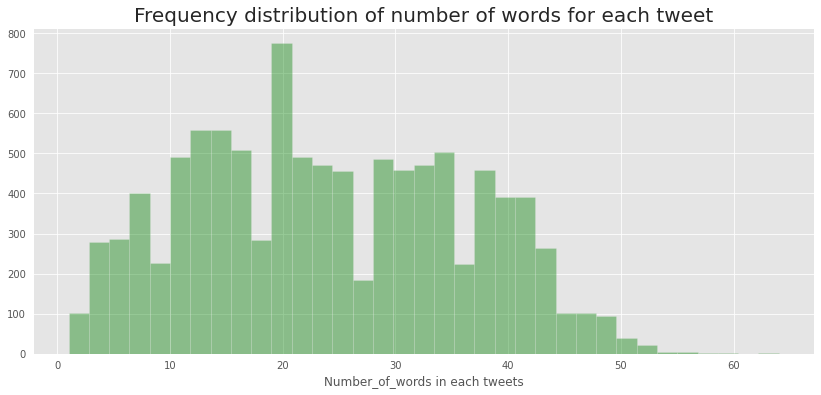

In [ ]:
df2['Number_of_words in each tweets'] = df2['Cleaned Tweets Further'].apply(lambda x:len(str(x).split()))

plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(df2['Number_of_words in each tweets'], kde = False,color="green")
plt.title("Frequency distribution of number of words for each tweet", size=20)

In [ ]:
max(df2['Number_of_words in each tweets']), min(df2['Number_of_words in each tweets'])

(64, 1)

**As for this file there is no column with name 'Category', which seperated flood from non-flood tweets, so only creation of single word cloud for the whole data is possible for this file.**

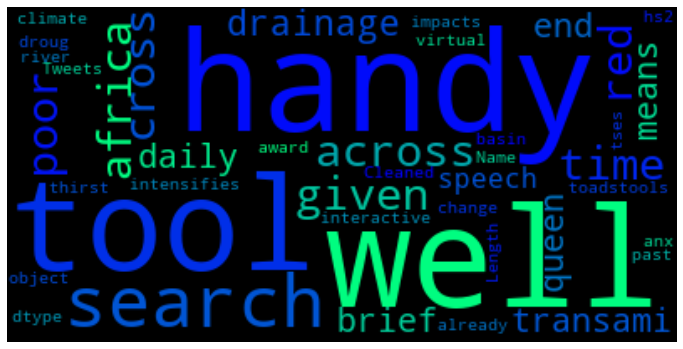

In [ ]:
cloud=WordCloud(colormap="winter").generate(str(df2["Cleaned Tweets Further"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

Text(0.5, 1.0, '30 most frequent words')

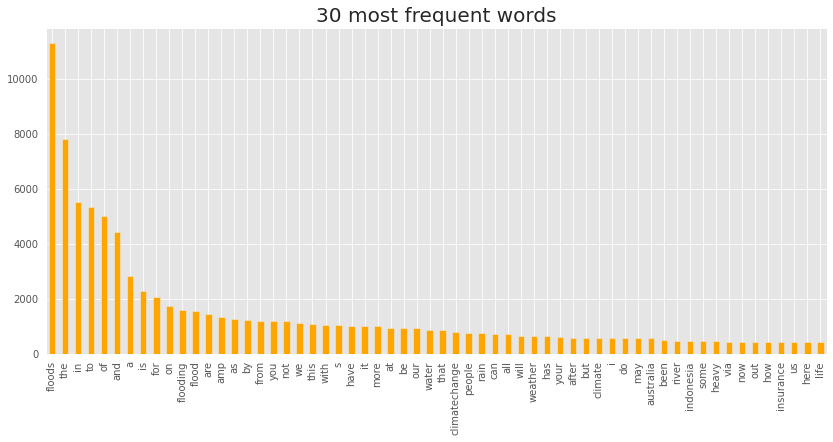

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(df2["Cleaned Tweets Further"]).split()).value_counts()[:60]
freq.plot(kind="bar", color = "orange")
plt.title("30 most frequent words",size=20)